<a href="https://colab.research.google.com/github/natuan310/w3-Data-Analysis-WorldCup-Dataset/blob/master/Tee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [0]:
# working on GG Drive csv data
wc = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCups.csv')
mch = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCupMatches.csv')
pls = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCupPlayers.csv')


# # working on local csv data
# wc = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCups.csv')
# mch = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCupMatches.csv')
# pls = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCupPlayers.csv')

---
# Week 3 Project - Data Analysis - Team 6 - World Cup Dataset


![alt text](https://hackernoon.com/hn-images/1*SYXzGp4V-ZWdYUCVT8DEeA.png)

**The FIFA World Cup**

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body.

The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The current champion is Germany, which won its fourth title at the 2014 tournament in Brazil.

---
## I. Project Infomation

- Data about FIFA World Cup from 1930 to 2014.
- Dataset has infomations about the cups, matches and players.
- Clean the data.
- Perform Exploratory Data Analysis on the dataset.
- Analyze the data more deeply and extract insights.


---
## II. Data Infomation
    
- The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups and the World Cup Players show all the infomation about footballs players had participated in World Cup.

---
<div>
<p style="text-align: center;"><strong>
1 - Worldcups: Infomation about each FIFA World Cup.
</strong></p> 

| Column Name    | Description                        | Data Type |
| -------------- | ---------------------------------- | --------- |
| Year           | Year of the worldcup               | int64     |
| Country        | Country of the worldcup            | object    |
| Winner         | Team who won the worldcup          | object    |
| Runners-Up     | Team who was the second place      | object    |
| Third          | Team who was the third place       | object    |
| Fourth         | Team who was the fourth place      | object    |
| GoalsScored    | Total goals scored in the worldcup | int64     |
| QualifiedTeams | Total participating teams          | int64     |
| MatchesPlayed  | Total matches played in the cup    | int64     |
| Attendance     | Total attendance of the worldcup   | object    |

</div>

In [8]:
display(wc.head(5))

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


---
<div>
<p style="text-align: center;"><strong>
2 - Matches: Infomation about world cup matches.
</strong></p> 


| Column Name          | Description                                                             | Data Type |
| -------------------- | ----------------------------------------------------------------------- | --------- |
| Year                 | The year in which the match was played                                  | float64   |
| Datetime             | The Date on which the match was played along with a 24 hour format time | object    |
| Stage                | The stage at which the match was played                                 | object    |
| Stadium              | Stadium name where the match was held                                   | object    |
| City                 | The city name, where the match was played                               | object    |
| Home Team Name       | Home team country name                                                  | object    |
| Home Team Goals      | Total goals scored by the home team by the end of the match             | float64   |
| Away Team Goals      | Total goals scored by the away team by the end of the match             | float64   |
| Away Team Name       | Away team country name                                                  | object    |
| Win conditions       | Special win condition (if any)                                          | object    |
| Attendance           | Total crowd present at the satdium                                      | float64   |
| Half-time Home Goals | Goals scored by the home team until half time                           | float64   |
| Half-time Away Goals | Goals scored by the away team until half time                           | float64   |
| Referee              | Name of the first refree                                                | object    |
| Assistant 1          | Name of the first assistant referee (linesman)                          | object    |
| Assistant 2          | Name of the second assistant referee (linesman)                         | object    |
| RoundID              | Unique ID of the Round                                                  | float64   |
| MatchID              | Unique ID of the match                                                  | float64   |
| Home Team Initials   | Home team country's three letter initials                               | object    |
| Away Team Initials   | Away team country's three letter initials                               | object    |


</div>

In [9]:
display(mch.head(5))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


---
<div>
<p style="text-align: center;"><strong>
3 - Players: Infomation about football players participated.
</strong></p> 


| Column Name   | Description                                                                                                                                         | Data Type |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- | --------- |
| RoundID       | Unique ID of the round                                                                                                                              | int64     |
| MatchID       | Unique ID of the match                                                                                                                              | int64     |
| Team Initials | Player's team initials                                                                                                                              | object    |
| Coach Name    | Name and country of the team coach                                                                                                                  | object    |
| Line-up       | S=Line-up, N=Substitute                                                                                                                             | object    |
| Shirt Number  | Shirt number if available                                                                                                                           | int64     |
| Player Name   | Name of the player                                                                                                                                  | object    |
| Position      | C=Captain, GK=Goalkeeper                                                                                                                            | object    |
| Event         | G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out | object    |

</div>

In [10]:
display(pls.head(5))

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


<div>
<p style="text-align: center;"><strong>
Players: Infomation about football players competed in 1930-2014
</strong></p> 


| Column Name   | Description                                                                                                                                         | Data Type |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- | --------- |
| RoundID       | Unique ID of the round                                                                                                                              | int64     |
| MatchID       | Unique ID of the match                                                                                                                              | int64     |
| Team Initials | Player's team initials                                                                                                                              | object    |
| Coach Name    | Name and country of the team coach                                                                                                                  | object    |
| Line-up       | S=Line-up, N=Substitute                                                                                                                             | object    |
| Shirt Number  | Shirt number if available                                                                                                                           | int64     |
| Player Name   | Name of the player                                                                                                                                  | object    |
| Position      | C=Captain, GK=Goalkeeper                                                                                                                            | object    |
| Event         | G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out | object    |

</div>

---
## III. Data Cleaning


---
### Clean null, duplicate data, error data.

---
- Table WorldCup is cleaned. No duplicate data.

In [11]:
wc.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

In [12]:
# Replace 'Germany Fr' to 'Germany' in world cup table
wc['Winner'].replace('Germany FR', 'Germany', inplace=True)
wc['Runners-Up'].replace('Germany FR', 'Germany', inplace=True)
wc['Third'].replace('Germany FR', 'Germany', inplace=True)
wc['Fourth'].replace('Germany FR', 'Germany', inplace=True)
wc['Winner'].unique()

array(['Uruguay', 'Italy', 'Germany', 'Brazil', 'England', 'Argentina',
       'France', 'Spain'], dtype=object)

---
- Table World Cup Matches: 852/4572 rows not null, some rows is duplicated.


In [13]:
dup_mch = mch['MatchID'].value_counts() # MatchID has duplicate rows
dup_id = dup_mch[dup_mch == 2]
mch[mch['MatchID'].isin(dup_id.index)]['Year']  #  The duplicate datas are matches in 2014

820    2014.0
821    2014.0
822    2014.0
823    2014.0
824    2014.0
825    2014.0
826    2014.0
827    2014.0
828    2014.0
829    2014.0
830    2014.0
831    2014.0
832    2014.0
833    2014.0
834    2014.0
835    2014.0
836    2014.0
837    2014.0
838    2014.0
839    2014.0
840    2014.0
841    2014.0
842    2014.0
843    2014.0
844    2014.0
845    2014.0
846    2014.0
847    2014.0
848    2014.0
849    2014.0
850    2014.0
851    2014.0
Name: Year, dtype: float64

In [14]:
# Drop duplicate rows
mch.drop_duplicates(keep="first", inplace=True)
mch.info()  # table Matches have 836 cleaned data rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 852
Data columns (total 20 columns):
Year                    836 non-null float64
Datetime                836 non-null object
Stage                   836 non-null object
Stadium                 836 non-null object
City                    836 non-null object
Home Team Name          836 non-null object
Home Team Goals         836 non-null float64
Away Team Goals         836 non-null float64
Away Team Name          836 non-null object
Win conditions          836 non-null object
Attendance              835 non-null float64
Half-time Home Goals    836 non-null float64
Half-time Away Goals    836 non-null float64
Referee                 836 non-null object
Assistant 1             836 non-null object
Assistant 2             836 non-null object
RoundID                 836 non-null float64
MatchID                 836 non-null float64
Home Team Initials      836 non-null object
Away Team Initials      836 non-null object
dtypes:

In [15]:
mch[mch['Year'].isnull()] 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
mch.drop(labels=mch[mch['Year'].isnull()].index, axis= 0, inplace= True)

In [0]:
# Fix text error in Stadium name
mch['Stadium'].unique()
""" Some Brazil Stadium name got error.
    'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio Jos� Mar�a Minella', 'Stade V�lodrome',
    'Nou Camp - Estadio Le�n', 'Estadio Ol�mpico Chateau Carreras', 'Estadio Ol�mpico Universitario', 'Estadio Municipal de Bala�dos'
"""
wrong_name = ['Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio Jos� Mar�a Minella', 'Stade V�lodrome',
              'Nou Camp - Estadio Le�n', 'Estadio Ol�mpico Chateau Carreras', 'Estadio Ol�mpico Universitario', 'Estadio Municipal de Bala�dos']
right_name = ['Maracana - Estadio Jornalista Mario Filho', 'Estadio Jose Maria Minella', 'Stade Velodrome',
              'Nou Camp - Estadio Leon', 'Estadio Olimpico Chateau Carreras', 'Estadio Olimpico Universitario', 'Estadio Municipal de Balaidos']
for w, r in zip(wrong_name, right_name):
    mch['Stadium'].replace(w, r, inplace= True)
# mch['Stadium'].unique()

In [0]:
# Combine Initials into Team Name to drop Initials column

mch['Home Team Name'] = mch['Home Team Name'] + ' (' + mch['Home Team Initials'] +')'
mch['Away Team Name'] = mch['Away Team Name'] + ' (' + mch['Away Team Initials'] +')'

In [0]:
# name_error = ['rn">Trinidad and Tobago (TRI)', "C�te d'Ivoire (CIV)",'rn">Republic of Ireland (IRL)','rn">Bosnia and Herzegovina (BIH)','rn">United Arab Emirates (UAE)']

mch['Home Team Name'] = mch['Home Team Name'].str.replace('rn">','')
mch['Home Team Name'].replace("C�te d'Ivoire (CIV)",  "Cote d'Ivoire (CIV)", inplace=True)
# mch['Home Team Name'].unique()

mch['Away Team Name'] = mch['Away Team Name'].str.replace('rn">','')
mch['Away Team Name'].replace("C�te d'Ivoire (CIV)",  "Cote d'Ivoire (CIV)", inplace=True)
# mch['Away Team Name'].unique()

In [20]:
# Matches 'Attendance' has 1 NaN value
mch['Attendance'].fillna(0,inplace=True)
mch[mch['Attendance'].isnull()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials


In [21]:
# Convert data type from float to int

mch['Year'] = mch['Year'].astype('int')
mch['Home Team Goals'] = mch['Home Team Goals'].astype('int')
mch['Away Team Goals'] = mch['Away Team Goals'].astype('int')
mch['Attendance'] = mch['Attendance'].astype('int')
mch['RoundID'] = mch['RoundID'].astype('int')
mch['MatchID'] = mch['MatchID'].astype('int')
mch.sample(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
330,1982,21 Jun 1982 - 17:15,Group 4,Jose Zorrilla,Valladolid,France (FRA),4,1,Kuwait (KUW),,30043,2.0,0.0,STUPAR Miroslav (URS),FREDRIKSSON Erik (SWE),MATOVINOVIC Damir (CRO),293,919,FRA,KUW


In [0]:
#  Drop column half time goals, initials

mch.drop(columns=['Half-time Home Goals', 'Half-time Away Goals','Home Team Initials','Away Team Initials'], inplace=True)

In [23]:
# Convert column 'Datetime' to datetime data type and remove the hour data
mch['Datetime'] = pd.to_datetime(mch['Datetime'])
mch['Datetime'] = mch['Datetime'].dt.date
mch['Datetime']

0      1930-07-13
1      1930-07-13
2      1930-07-14
3      1930-07-14
4      1930-07-15
          ...    
831    2014-07-05
832    2014-06-29
833    2014-06-29
834    2014-07-01
835    2014-07-01
Name: Datetime, Length: 836, dtype: object

---
- Table Players

In [24]:
pls.info() # pls table has 37848 clean rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Player Name      37784 non-null object
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [25]:
pls.drop_duplicates(keep="first", inplace=True)
pls.info() # pls table has 37048 clean rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
RoundID          37048 non-null int64
MatchID          37048 non-null int64
Team Initials    37048 non-null object
Coach Name       37048 non-null object
Line-up          37048 non-null object
Shirt Number     37048 non-null int64
Player Name      37048 non-null object
Position         4018 non-null object
Event            8823 non-null object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


In [26]:
pls.sample(1)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
28587,97410100,97410012,JPN,ZICO (BRA),S,23,KAWAGUCHI,GK,NaN


In [0]:
 # Fill data to null row in column 'Event'
pls['Event'].isnull().sum() # Position column has 28225 null rows
pls['Event'].fillna('No Event', inplace=True)

In [0]:
# Drop columns from table Players
pls.drop(columns=['RoundID', 'Coach Name', 'Line-up', 'Shirt Number', 'Position'], inplace=True)

In [29]:
pls.sample()

,MatchID,Team Initials,Player Name,Event
8365,1702,POR,ALEXANDRE BAPTISTA,No Event


---
## IV - Analyze Data

---
#### 1. Summary of Worldcup infomation
    

- World Cup overview by number of football team and football fans.

In [30]:
wc.sample()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
11,1982,Spain,Italy,Germany,Poland,France,146,24,52,2.109.723


No handles with labels found to put in legend.


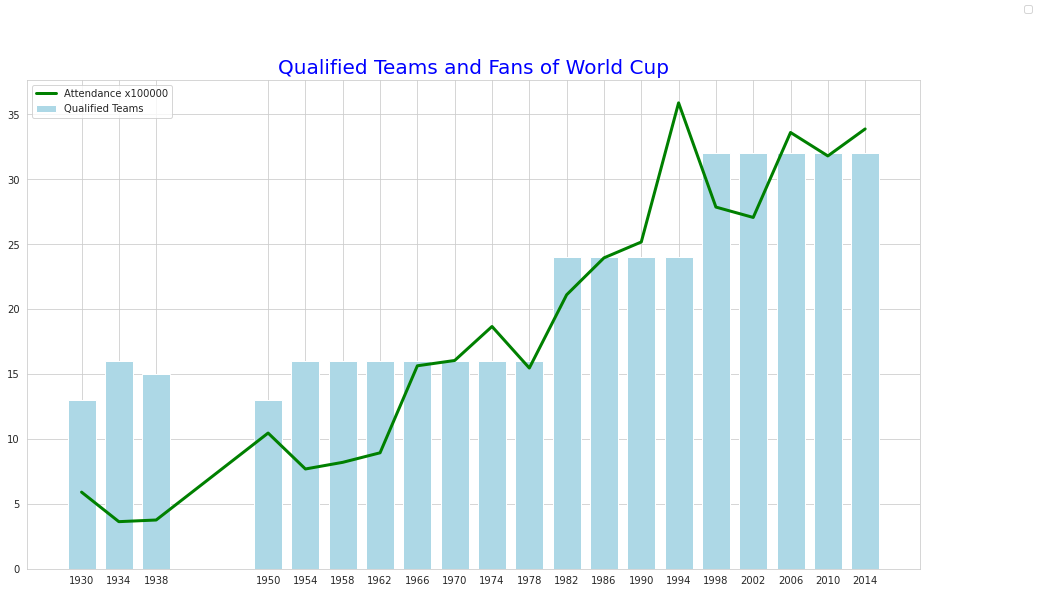

In [58]:
fig, ax = plt.subplots(figsize=(16,9))
plt.figlegend(columnspacing=5)

atten = wc['Attendance'].str.replace('.', '').astype(float)
ax1 = plt.bar(wc['Year'], wc['QualifiedTeams'], color='lightblue', label = 'Qualified Teams', width = 3)
ax2 = plt.plot(wc['Year'], atten/100000, color='g', label = 'Attendance x100000', lw = 3)
plt.title('Qualified Teams and Fans of World Cup', color = 'b', fontsize = 20)
plt.xticks(wc['Year'])
plt.legend(loc=2)
plt.show()

- Total matches played and qualified teams by year

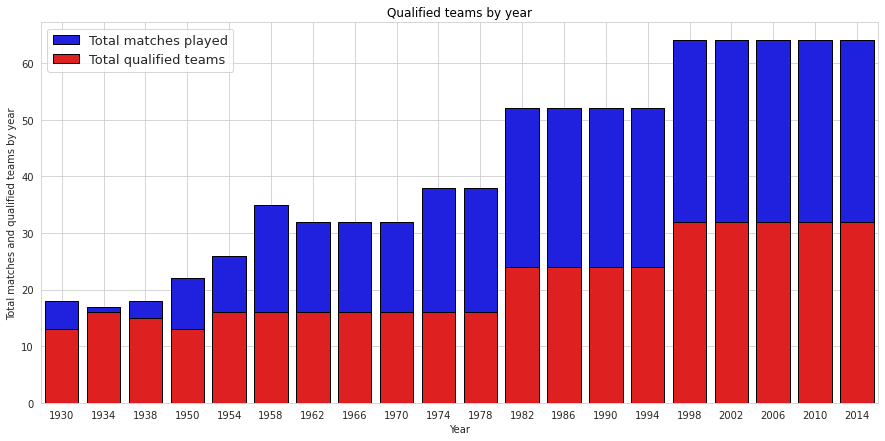

In [0]:
plt.figure(figsize=(15,7))
sns.barplot(wc["Year"], wc["MatchesPlayed"], linewidth=1,
            edgecolor="k"*len(wc), color="b", label="Total matches played")
sns.barplot(wc["Year"], wc["QualifiedTeams"], linewidth=1,
            edgecolor="k"*len(wc), color="r", label="Total qualified teams")
plt.legend(loc="best", prop={"size":13})
plt.title("Qualified teams by year", color='k')
plt.grid(True)
plt.ylabel("Total matches and qualified teams by year")
plt.show()

- Total attendence of world cups by year

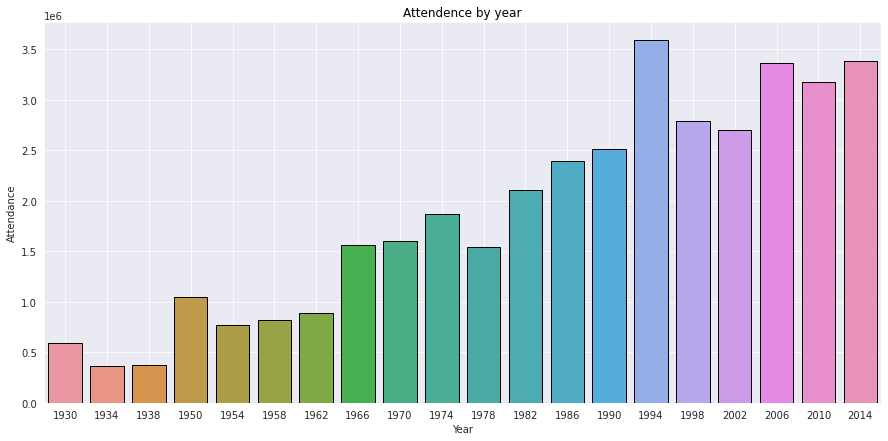

In [0]:
att = mch.groupby("Year")["Attendance"].sum().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year", color='k')
plt.show()

- Average attendence by year

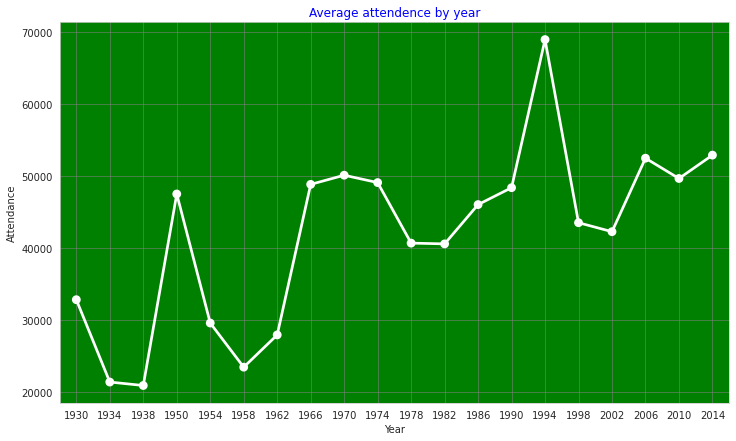

In [0]:
#Group number of attendance by year, use mean value

att1 = mch.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)


#Plotintg the figure
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="white")
ax.set_facecolor("green")
plt.grid(True,color="grey",alpha=.7)
plt.title("Average attendence by year",color='b')

plt.show()

- Total goals scored by year

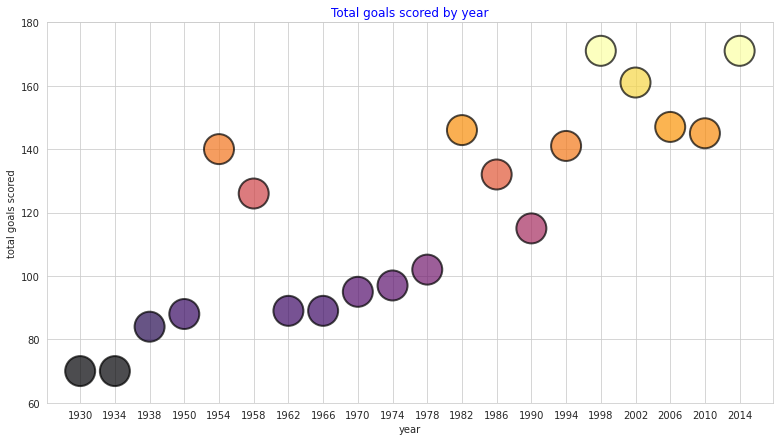

In [0]:
#Create the plot
plt.figure(figsize=(13,7))

wc["Year1"] = wc["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=wc,
            c=wc["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(wc["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

- Cities that hosted highest world cup matches

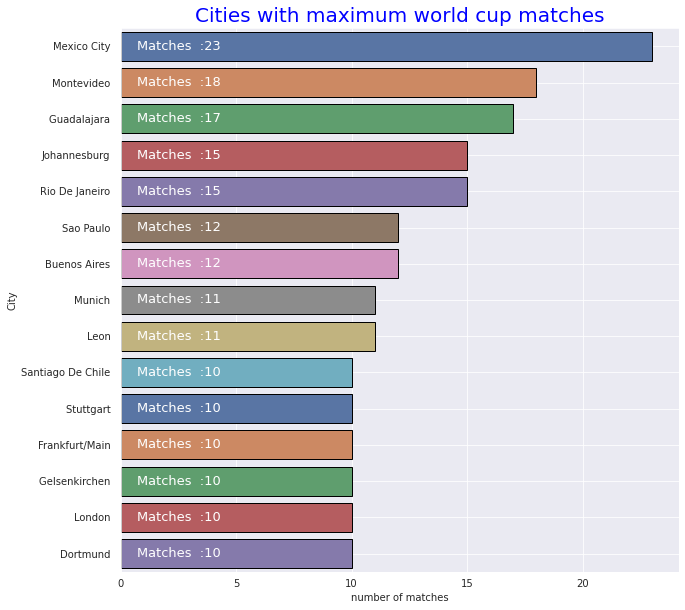

In [0]:
top_city = mch['City'].value_counts().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(y=top_city["index"][:15],x = top_city["City"][:15],palette="deep",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b',fontsize=20)

for i,j in enumerate("Matches  :" + top_city["City"][:15].astype(str)):
    ax.text(.7,i,j, verticalalignment='center', fontsize = 13,color="w")
plt.show()

- Average attendance by city

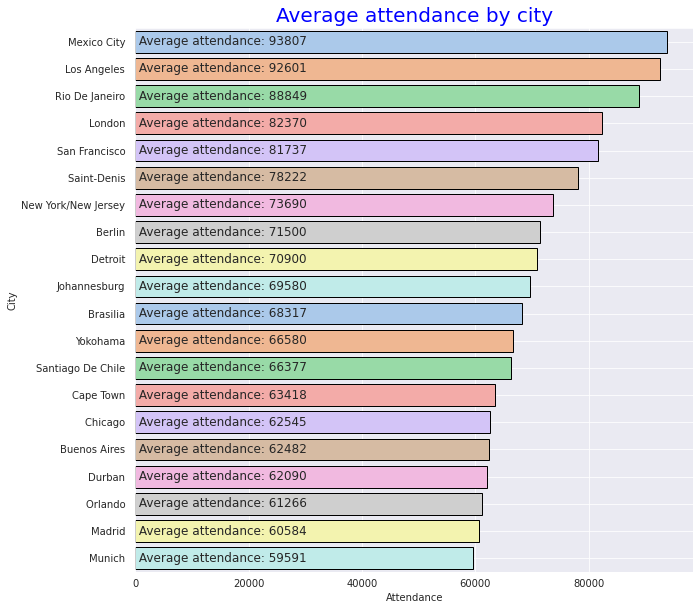

In [0]:
ct_at = mch.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "pastel")

for i,j in enumerate(" Average attendance: "+ np.around(ct_at["Attendance"][:20]).astype(int).astype(str)):
    ax.text(0,i,j, verticalalignment='center', fontsize=12)

plt.grid(True)
plt.title("Average attendance by city",color='b',fontsize=20)
plt.show()


---
#### 2. Detail about teams

- Teams with the most world cup final victories

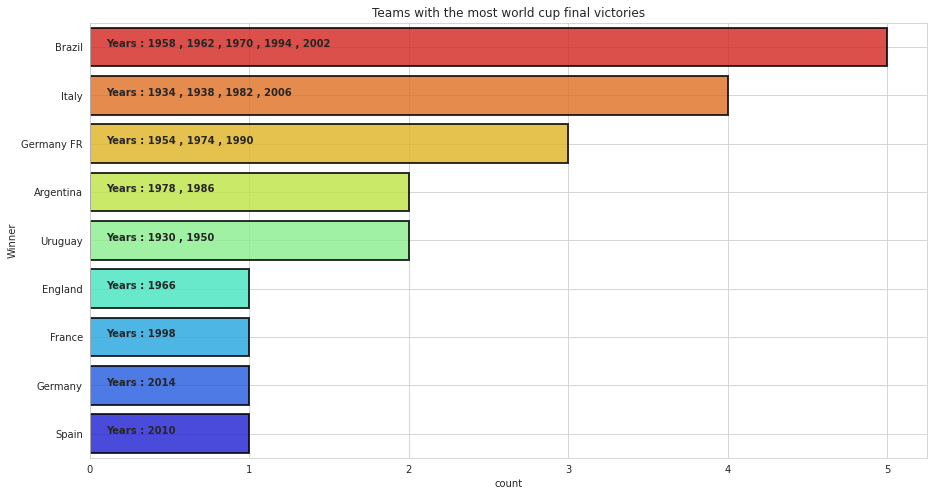

In [0]:
wc["Year1"] = wc["Year"].astype(str)
c1  = wc.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = wc.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2, left_on="Winner", right_on="Winner", how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(15,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

- World cup final results by nation

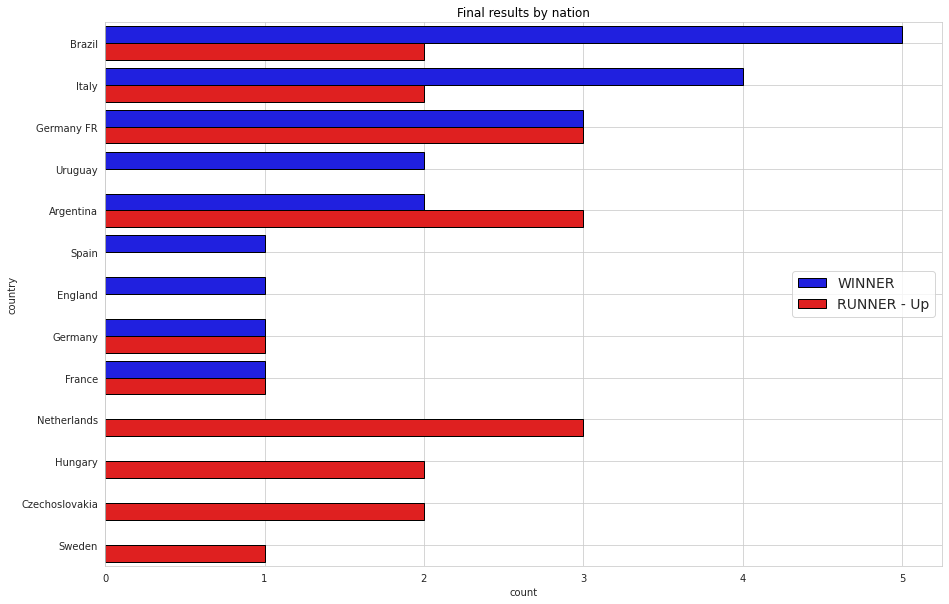

In [0]:
cou = wc["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = wc["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r], axis=0)

plt.figure(figsize=(15,10))
sns.barplot("count","country", data=cou_t,
            hue="type", palette=["b","r"],
            linewidth=1, edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='k')
plt.show()

- World cup final result for third and fourth place by nation

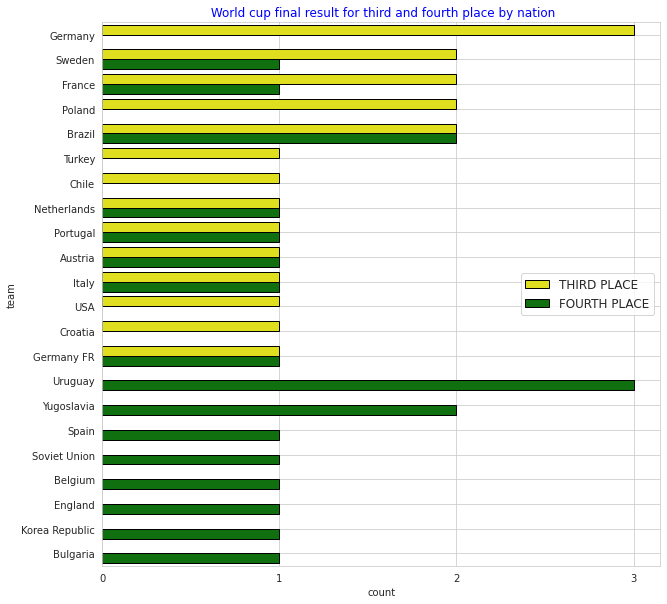

In [0]:
#Create table for number of third and fourth place by each country 
thrd = wc["Third"].value_counts().reset_index()
thrd.columns = ["team","count"] 
thrd["type"] = "THIRD PLACE"

frth = wc["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

#combine the third and fourth place table
plcs = pd.concat([thrd,frth],axis=0)

#plot the figure
plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["yellow","green"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b')
plt.legend(loc="center right",prop={"size":12})
plt.show()

- Teams with the most world cup matches

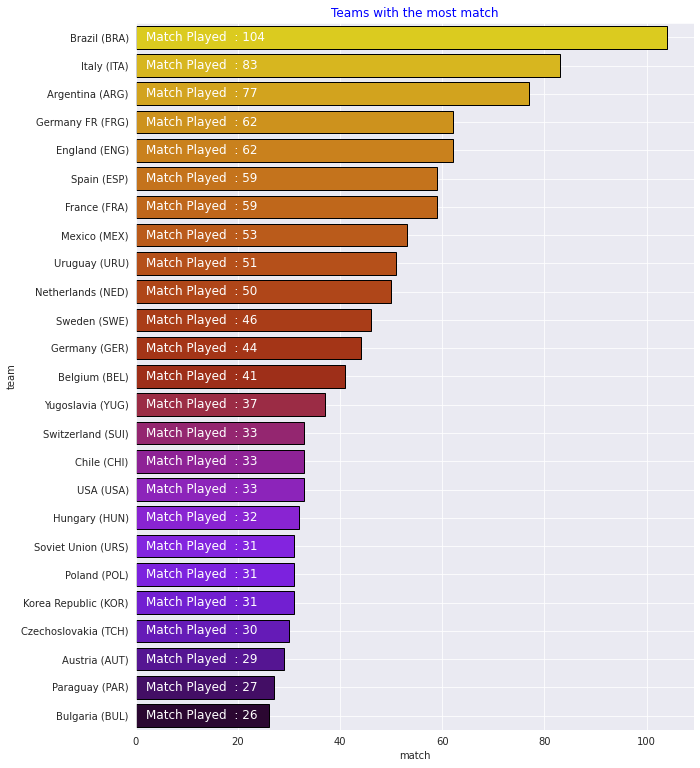

In [0]:
# Count number of times each counrty host the game (home_team) and join the game at another country (away_team)
ht = mch["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","match"]
at = mch["Away Team Name"].value_counts().reset_index()
at.columns = ["team","match"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["match"].sum().reset_index().sort_values(by="match",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("match","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most match",color='b')
for i,j in enumerate("Match Played  : " + mt["match"][:25].astype(str)):
    ax.text(2,i,j,verticalalignment='center',fontsize=12,color="white")

- Teams with the most tournament participations

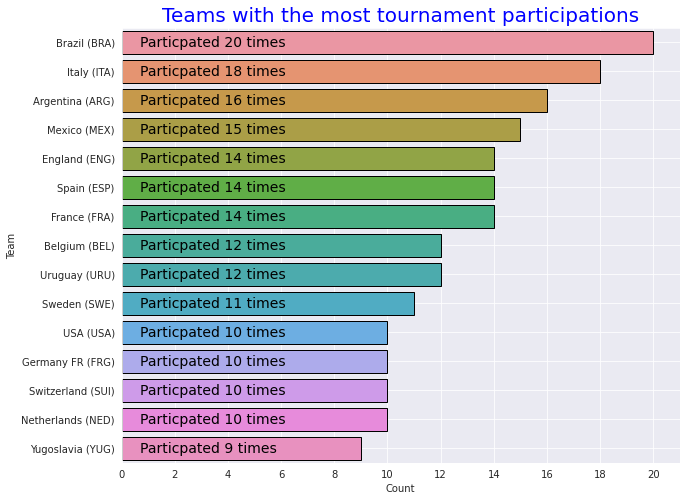

In [0]:
home = mch[['Year','Home Team Name']]
home.columns = ['Year', 'Team']
home['Type'] = 'Home Team'
away = mch[['Year','Away Team Name']]
away.columns = ['Year', 'Team']
away['Type'] = 'Away Team'

home_away = pd.concat([home, away], axis= 0)
yt = home_away.groupby(['Year', 'Team']).count().reset_index()
yt = yt['Team'].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot('Team','index',data=yt[:15],linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt['Team'][:15].astype(str) + " times"):
    ax.text(.7,i,j,verticalalignment='center',fontsize=14,color="k",)
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b',fontsize=20)
plt.ylabel("Team")
plt.xlabel("Count")
plt.xticks(np.arange(0,22,2))
plt.show()

- Match outcomes by countries

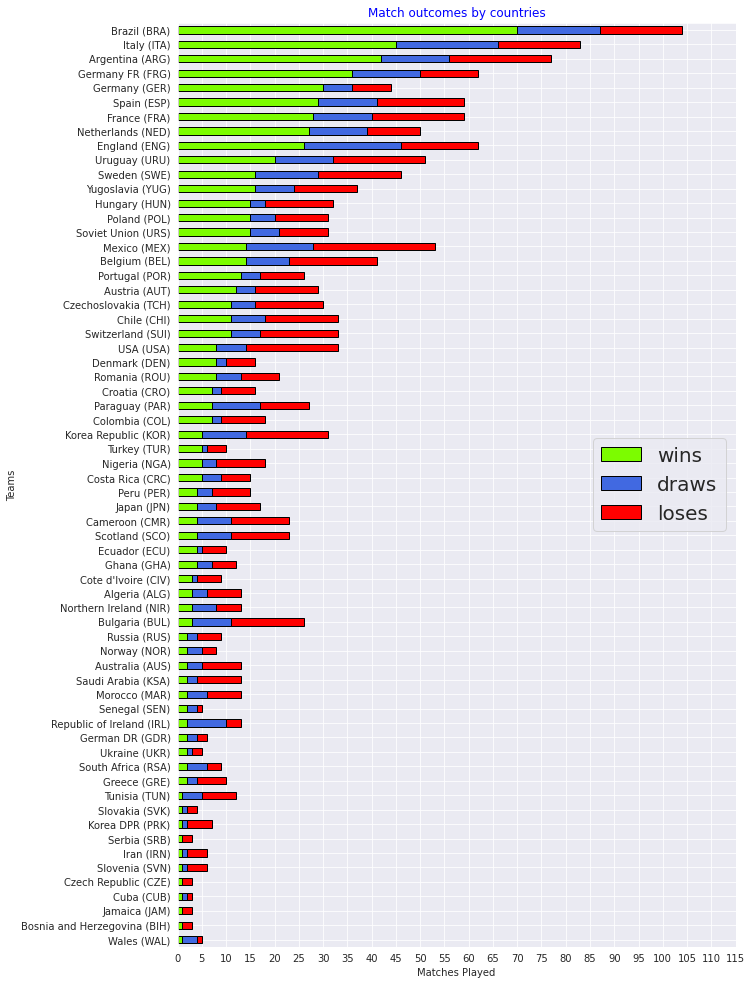

In [0]:
def label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return "Home team win"
    if mch["Away Team Goals"] > mch["Home Team Goals"]:
        return "Away team win"
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["outcome"] = mch.apply(lambda mch:label(mch),axis=1)

mch[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]

def win_label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
def lst_label(mch):
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["win_team"]  = mch.apply(lambda mch:win_label(mch),axis=1)
mch["lost_team"] = mch.apply(lambda mch:lst_label(mch),axis=1)
lst = mch["lost_team"].value_counts().reset_index()
win = mch["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["match"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='b')
plt.ylabel('Teams')
plt.xlabel("Matches Played")
plt.show()

---
#### 3. Detail about matches


- Matches with highest number of attendance

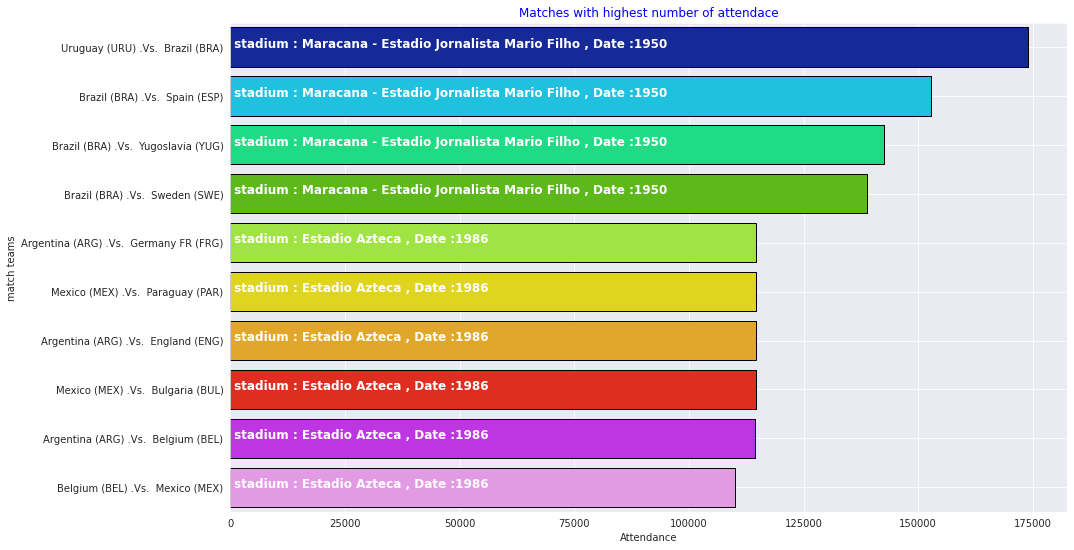

In [0]:
h_att = mch.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Datetime"] = h_att["Datetime"].astype(str).str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(15,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

- Match outcomes by home and away teams

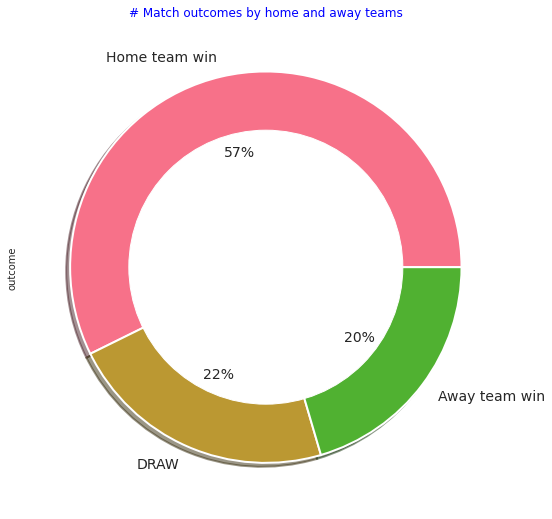

In [0]:
def label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return "Home team win"
    if mch["Away Team Goals"] > mch["Home Team Goals"]:
        return "Away team win"
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["outcome"] = mch.apply(lambda mch:label(mch),axis=1)
plt.figure(figsize=(9,9))
mch["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

- Distribution of home and away goals

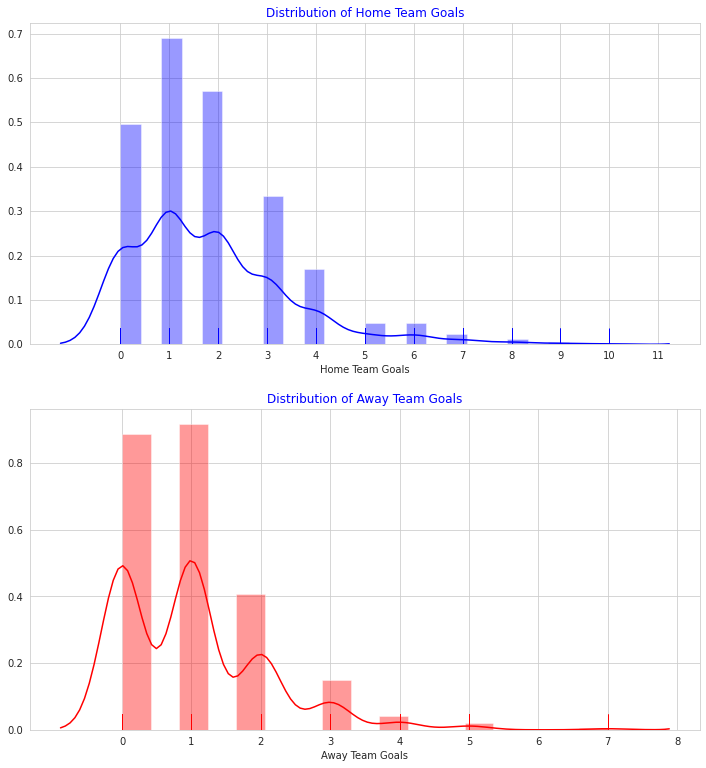

In [0]:

plt.figure(figsize=(12,13))

plt.subplot(211)
sns.distplot(mch["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(mch["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')

plt.show()

- Teams with highest fifa world cup goals

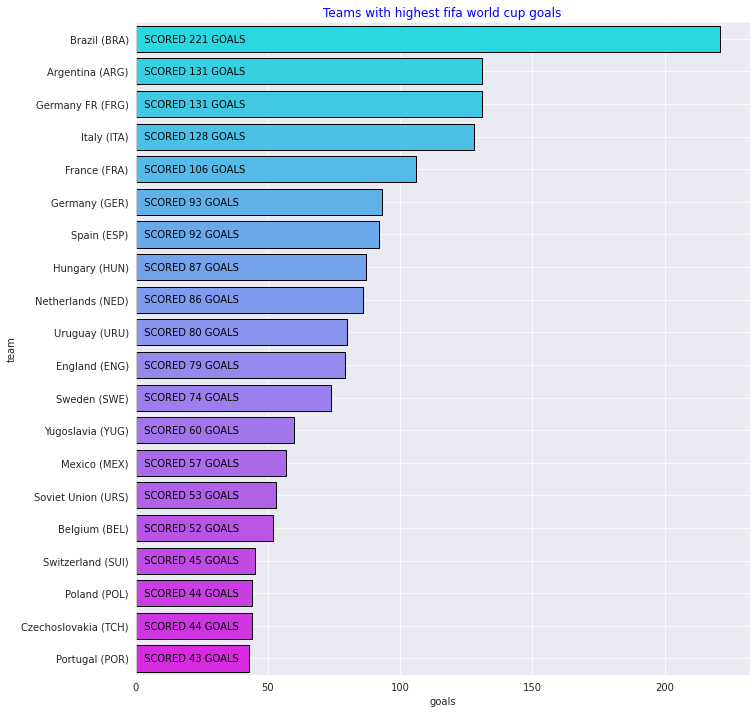

In [0]:
tt_gl_h = mch.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = mch.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(11,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("  SCORED " +total_goals["goals"][:20].astype(str) + " GOALS"):
    ax.text(.7,i,j,verticalalignment='center',fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b')
plt.grid(True)
plt.show()

- Highest total goals scored during a match

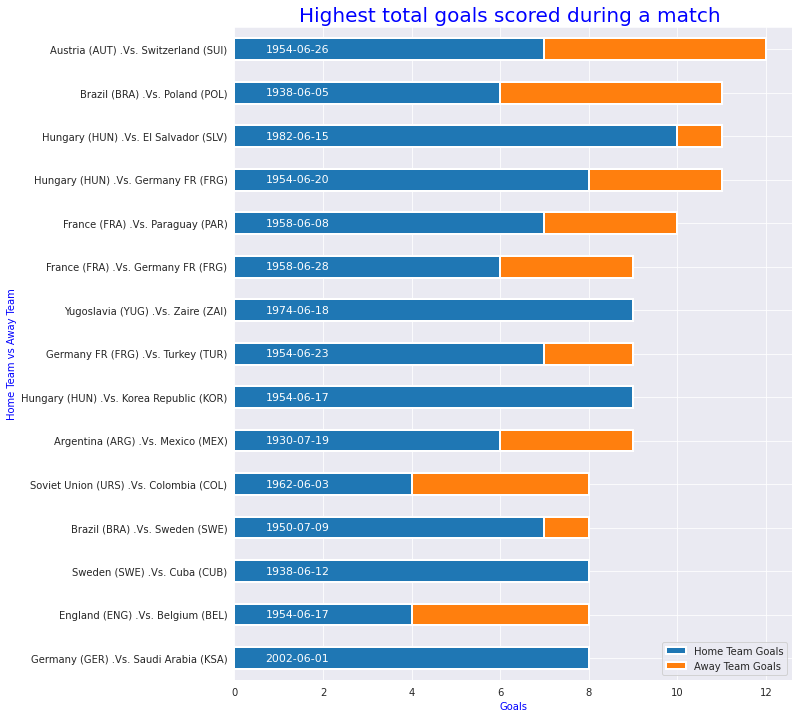

In [0]:
mch["total_goals"] = mch["Home Team Goals"] + mch["Away Team Goals"]
hig_gl = mch.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)

ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh", figsize=(10,12),stacked=True, linewidth=2, edgecolor="w"*15)

plt.ylabel("Home Team vs Away Team",color="b")
plt.xlabel("Goals",color="b")
plt.title("Highest total goals scored during a match ",color='b', fontsize=20)
hig_gl["Datetime"].astype('object')
for i,j in enumerate(hig_gl['Datetime']):
    ax.text(.7,i,j,verticalalignment='center', color="w",fontsize=11)

plt.show()

- Total goals scored during games by year

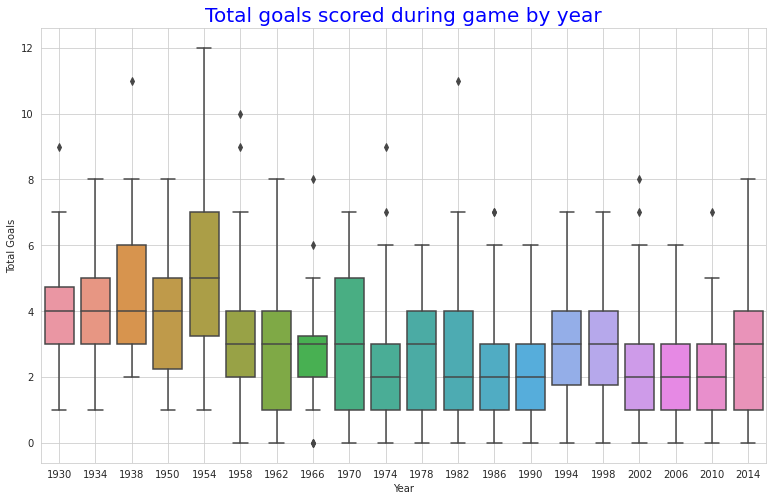

In [0]:
plt.figure(figsize=(13,8))
sns.boxplot(y=mch["total_goals"], x=mch["Year"])
plt.ylabel('Total Goals')
plt.grid(True)
plt.title("Total goals scored during game by year",color='b', fontsize=20)
plt.show()

---
#### 4. Team comparator


In [0]:
# TEAM COMPARATOR
match_played = mt.copy()

# Create list of won and lost team

def win_label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
def lst_label(mch):
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
mch["win_team"]  = mch.apply(lambda mch:win_label(mch),axis=1)
mch["lost_team"] = mch.apply(lambda mch:lst_label(mch),axis=1)
lst = mch["lost_team"].value_counts().reset_index()
win = mch["win_team"].value_counts().reset_index()


In [0]:
#Create win_team, lost_team column:
mch["win_team"]  = mch.apply(lambda mch:win_label(mch),axis=1)
mch["lost_team"] = mch.apply(lambda mch:lst_label(mch),axis=1)

lst = mch["lost_team"].value_counts().reset_index()
mat_new = match_played.merge(lst,left_on="team",right_on="index",how="left")
mat_new = mat_new.merge(win,left_on="team",right_on="index",how="left")
mat_new = mat_new[["team","match","lost_team","win_team"]]
mat_new = mat_new.fillna(0)
mat_new["win_team"] = mat_new["win_team"].astype(int)
mat_new["draws"]    = (mat_new["match"]) - (mat_new["lost_team"] + mat_new["win_team"])
mat_new = mat_new.merge(total_goals,left_on="team",right_on="team",how="left")
mat_new = mat_new.rename(columns={"win_team":"wins","lost_team":"loses"})

#team Compare function
def team_compare(team1,team2):
    
    lst = [team1,team2]
    dat = mat_new[mat_new["team"].isin(lst)]
    
    plt.figure(figsize=(12,10))
    cols   = ["match","goals","wins","loses","draws"]
    length = len(cols)
    
    for i,j in itertools.zip_longest(cols,range(length)):
        
        fig = plt.subplot(3,2,j+1)
        ax  = sns.barplot(dat[i],dat["team"],palette=["royalblue","r"],
                         linewidth=2,edgecolor="k"*len(lst))
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True,color="grey",alpha=.3)
        plt.title(i,color="b",fontsize=15)
        plt.subplots_adjust(wspace = .3,hspace =.5)
        fig.set_facecolor("w")
        
        for k,l in enumerate(dat[i].values):
            ax.text(.7,k,l,weight = "bold",fontsize = 20)

- Portugal & Argentina

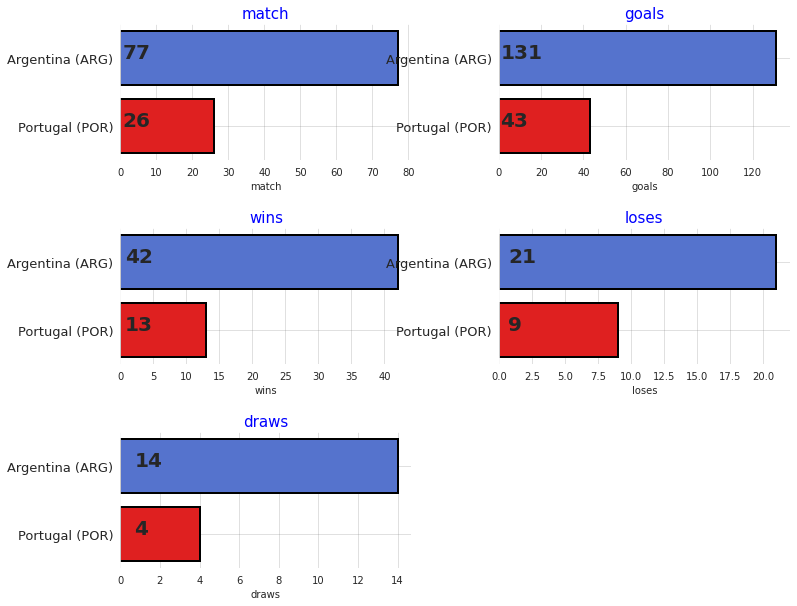

In [0]:
team_compare("Portugal (POR)","Argentina (ARG)")

- France & Croatia

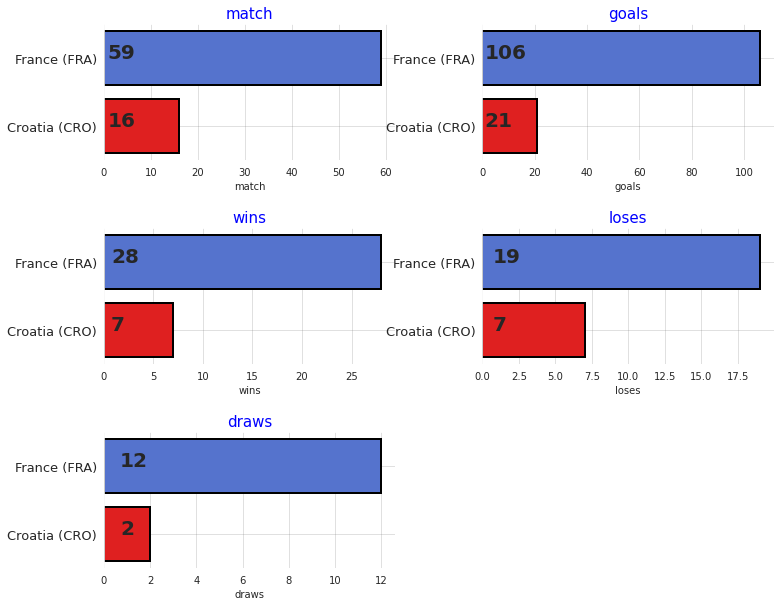

In [0]:
team_compare("France (FRA)","Croatia (CRO)")

- Spain & Italy

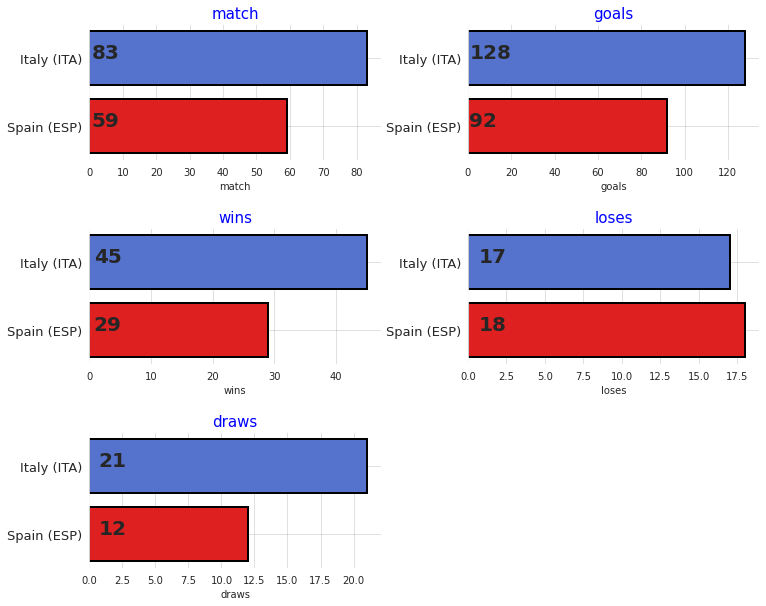

In [0]:
team_compare("Italy (ITA)","Spain (ESP)")

- Brazil & Germany

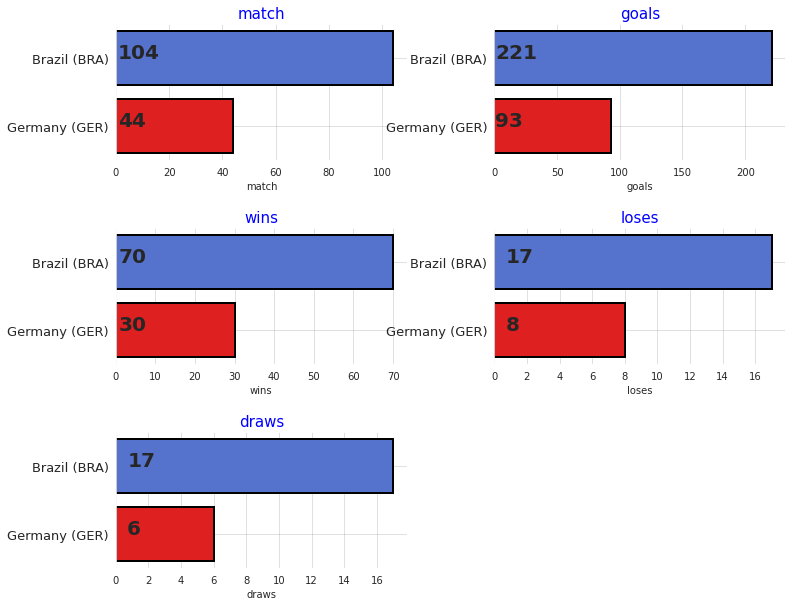

In [0]:
team_compare("Brazil (BRA)","Germany (GER)")

- Goals per game by top countries

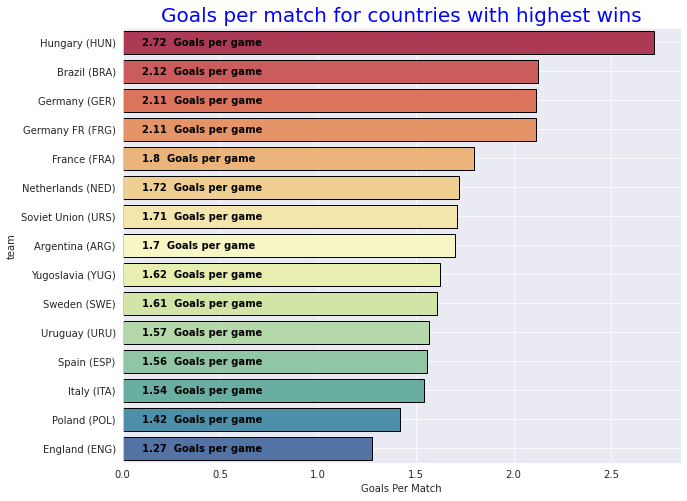

In [0]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["match"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot("goals_per_match","team",
                 linewidth=1,
                 edgecolor=["k"]*len(cou_gpm),
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,verticalalignment='center',color="k",weight = "bold")

plt.xlabel('Goals Per Match')
plt.grid(True)
plt.title("Goals per match for countries with highest wins",color='b', fontsize=20)
plt.show()

- Total world cup matches played in each country

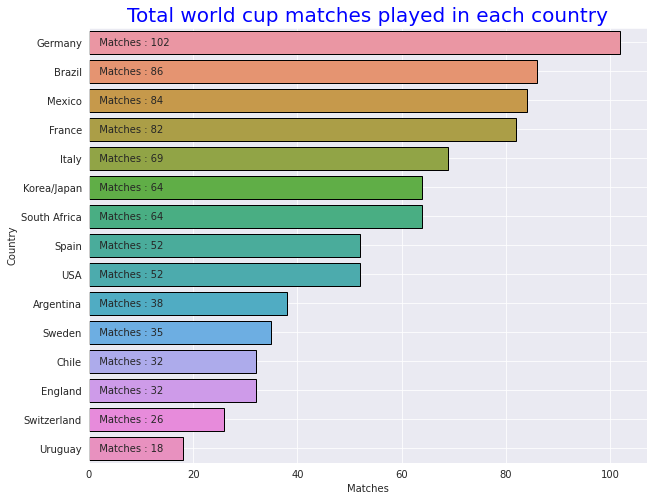

In [0]:
ysc = mch[["Year","Stadium","City","MatchID"]]
cy  = wc[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot("MatchID","Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k"*cnt_mat["Country"].nunique())

for i,j in enumerate("  Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j, verticalalignment='center')

plt.title("Total world cup matches played in each country", color='b', fontsize= 20)
plt.grid(True)
plt.xlabel("Matches")
plt.show()

--- 
#### 5. Detail about winner mathes

In [0]:
wc.sample()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Year1
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1930


- Win-Lost-Goals betweens Winner and Runner-up each year.

In [0]:
win_run = wc[['Year', 'Winner', 'Runners-Up']]
winn = win_run['Winner'].tolist()
runn = win_run['Runners-Up'].tolist()
mch_by_year = mch.copy()
mch_by_year
winn.info()

- Win-Lost-Goals betweens Third and Fourth each year.